In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

In [2]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  SGTData_Pandas310012025A.csv
Masukkan File CSV  :  SGTData_Pandas31012025A.csv


,Month,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,Jan-17,35058035.70,4205899.604,3.035133,9.153033,51331446.00
1,Feb-17,32749915.93,3738394.116,2.954104,9.865582,50819764.44
2,Mar-17,33460435.31,4277640.663,2.920290,9.388769,55697679.00
3,Apr-17,36270798.22,4595871.334,2.883726,10.063100,54963784.00
4,May-17,39840063.50,4517361.051,2.950965,10.078527,57712934.00
...,...,...,...,...,...,...
91,Aug-24,32144317.34,3940544.778,4.235707,13.529430,57964721.00
92,Sep-24,35126791.18,3835466.333,4.397071,14.363576,62507975.00
93,Oct-24,33005253.86,3795132.076,4.236191,13.794983,59739749.00
94,Nov-24,31986885.58,3566161.838,4.274417,14.770507,58881360.30


---
### Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library).

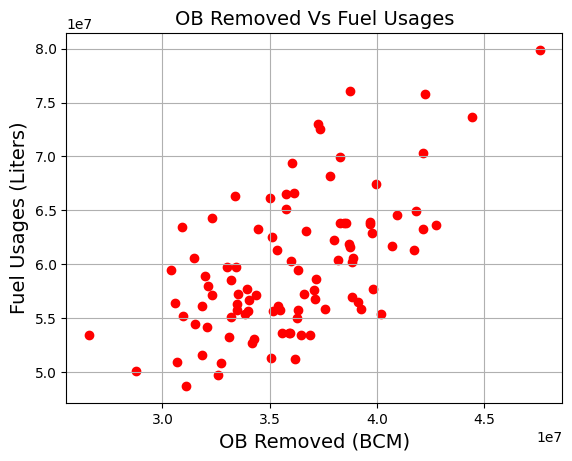

In [3]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

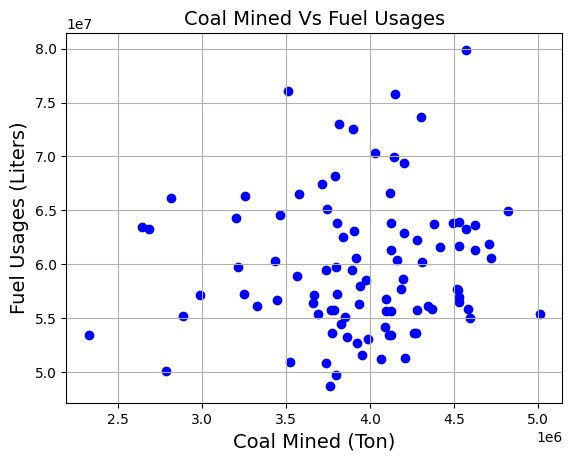

In [4]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

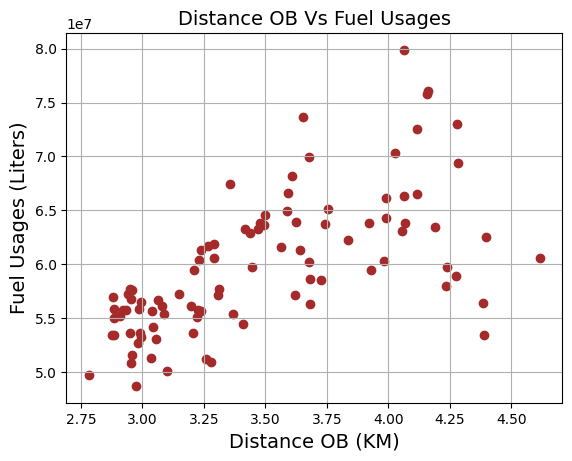

In [5]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

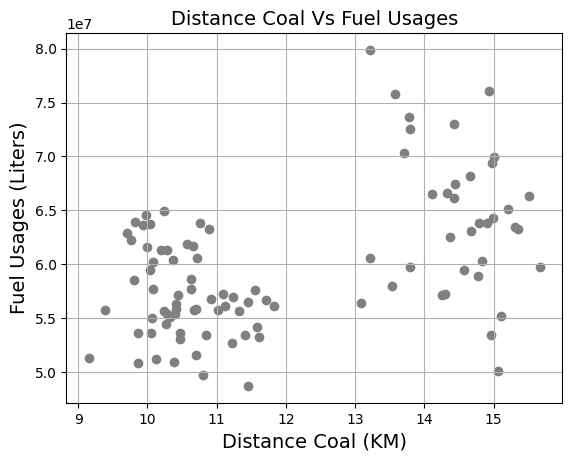

In [6]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

From Linearity test above we found that OB Removed, and OB Distance have linier relantionship with Fuel Usages

In [7]:
dataset = dataset.drop(['Month'], axis=1)

In [8]:
correlations = dataset.corr()
correlations['Fuel']

OB (Bcm)              0.596794
Coal (Ton)            0.079378
Distance OB (KM)      0.641485
Distance Coal (KM)    0.474545
Fuel                  1.000000
Name: Fuel, dtype: float64

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns

In [10]:
x = dataset[['OB (Bcm)','Distance OB (KM)']]
y = dataset['Fuel']

# Split dataset (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
# ==============================
# Linear Regression (sklearn)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [13]:
# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-Validation (5-fold)
cv_scores = cross_val_score(regr, X_train, y_train, cv=3, scoring='r2')

# Print Results
print("\n📌 Model Performance Metrics:")
print(f"Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
print(f"Train MAE: {train_mae:.3f} | Test MAE: {test_mae:.3f}")
print(f"Train R² Score: {train_r2:.3f} | Test R² Score: {test_r2:.3f}")

print("\n📌 Cross-Validation Results:")
print(f"R² Scores for each fold: {cv_scores.round(3)}")
print(f"Mean R² Score: {cv_scores.mean():.3f} | Std Dev: {cv_scores.std():.3f}")


📌 Model Performance Metrics:
Train MSE: 8761382595558.545 | Test MSE: 13143162173678.477
Train MAE: 2504203.374 | Test MAE: 2961051.947
Train R² Score: 0.773 | Test R² Score: 0.680

📌 Cross-Validation Results:
R² Scores for each fold: [0.83  0.72  0.653]
Mean R² Score: 0.734 | Std Dev: 0.073


In [14]:
# ==============================
# Linear Regression (statsmodels)
# ==============================
X_const = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y, X_const).fit()
print("\n📌 Statsmodels Regression Summary:")
print(model.summary())


📌 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           6.80e-29
Time:                        00:03:16   Log-Likelihood:                -1572.5
No. Observations:                  96   AIC:                             3151.
Df Residuals:                      93   BIC:                             3159.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const

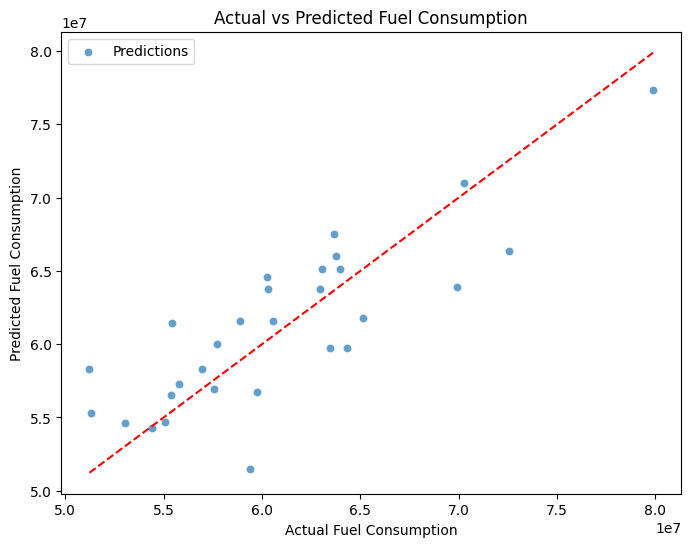

In [15]:
# ==============================
# Plot: Actual vs Predicted
# ==============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.legend()
plt.show()

In [16]:
# Model Intercept
print(f"Intercept: {regr.intercept_:.3f}")

# Model Coefficients
coef_dict = dict(zip(x.columns, regr.coef_))  # Match feature names to coefficients
print("Coefficients:")
for feature, coef in coef_dict.items():
    print(f"  {feature}: {coef:.3f}")

Intercept: -7576948.306
Coefficients:
  OB (Bcm): 1.115
  Distance OB (KM): 7835910.783


In [17]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 3 most relevant features
selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(x, y)

# Print selected feature names (use 'x' instead of 'X')
selected_features = x.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['OB (Bcm)', 'Distance OB (KM)']
